Task 1: Read the lab notes and write down the purpose of each command in the this notebook.

In [ ]:
from sklearn.datasets import load_digits

#imports the digits dataset from sklearn.datasets

In [ ]:
digits = load_digits()
# creates a variable 'digits' and assigns it the value of the loaded digits dataset

In [ ]:
print(digits.DESCR)
# prints all the information about the digits dataset

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
digits.target[1:20]
# displays the target values for the first 20 samples in the dataset

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
digits.data.shape
# displays how many samples and features are in the dataset

(1797, 64)

In [ ]:
digits.images[13]
# displays the image data for the 14th sample in the dataset

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [ ]:
digits.data[13]
# displays the flattened feature vector for the 14th sample in the dataset

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

In [ ]:
digits.target[13]
# displays the target value for the 14th sample in the dataset

np.int64(3)

In [ ]:
import matplotlib.pyplot as plt
# imports the matplotlib.pyplot library for data visualisation

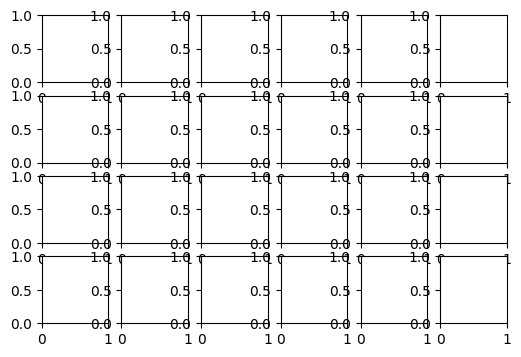

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))
# creates a figure and a grid of subplots with 4 rows and 6 columns, setting the overall figure size

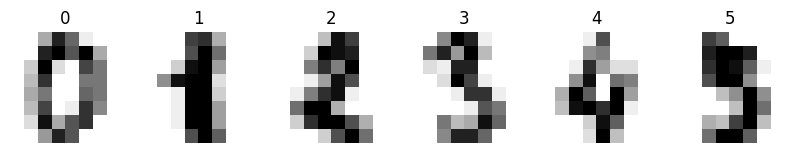

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for axes, image, target in zip(axes, digits.images, digits.target):
    axes.set_axis_off()
    axes.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    axes.set_title(target)

    # loops through each axis, image, and target value in the digits dataset to display the images with their corresponding target values as titles

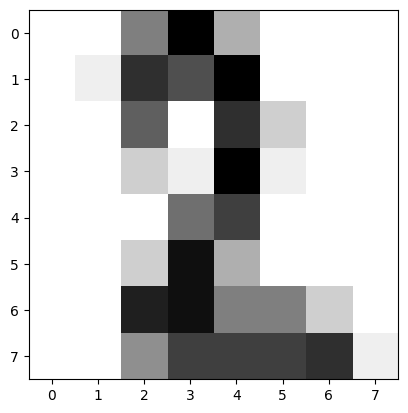

In [ ]:
image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)
# displays the 23rd image in the digits dataset using a grayscale color map

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.20)

# splits the digits dataset into training and testing sets, with 20% of the data used for testing and a random state of 11 for reproducibility


In [ ]:
X_train.shape
# displays how many samples and features are in the training set

(1437, 64)

In [ ]:
y_train.shape
# displays how many target values are in the training set

(1437,)

In [ ]:
X_test.shape
# displays how many samples and features are in the testing set

(360, 64)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# imports the KNeighborsClassifier from sklearn.neighbors

In [ ]:
knn = KNeighborsClassifier()
# creates a variable 'knn' and assigns it an instance of the KNeighborsClassifier

In [ ]:
knn.fit(X=X_train, y=y_train)
# fits the KNN variable to the training data

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
predicted = knn.predict(X=X_test)
# uses KNN to predict the target values for the test data and stores the predictions in the variable 'predicted'

In [ ]:
expected = y_test
# assigns the true target values from the test set to the variable 'expected'

In [ ]:
predicted[:20]
# displays the first 20 predicted target values

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [ ]:
expected[:20]
# displays the first 20 expected target values

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

In [ ]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]
# creates a list of tuples containing the predicted and expected values for all misclassified samples

In [ ]:
wrong
# displays the list of misclassified samples

[(np.int64(5), np.int64(3)),
 (np.int64(8), np.int64(9)),
 (np.int64(4), np.int64(9)),
 (np.int64(7), np.int64(3)),
 (np.int64(7), np.int64(4))]

In [ ]:
print(f'{knn.score(X_test, y_test):.2%}')
# calculates and prints the accuracy of KNN on the test set

98.61%


In [ ]:
from sklearn.metrics import confusion_matrix
# imports the confusion_matrix function from sklearn.metrics

In [ ]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
# creates a confusion matrix using the expected and predicted target values

In [ ]:
confusion
# displays the confusion matrix

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]])

In [ ]:
from sklearn.metrics import classification_report
# imports the classification_report function from sklearn.metrics

In [ ]:
names = [str(digit) for digit in digits.target_names]
# creates a list of strings representing the target names in the digits dataset

In [ ]:
print(classification_report(expected, predicted,
          target_names=names))

# prints a classification report showing precision, recall, f1-score, and support for each class in the digits dataset


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
import pandas as pd
# imports the pandas library for data manipulation and analysis

In [ ]:
confusion_df = pd.DataFrame(confusion, index=range(10),
         columns=range(10))

# creates a pandas DataFrame from the confusion matrix with row and column labels from 0 to 9

In [ ]:
import seaborn as sns
# imports the seaborn library for data visualisation

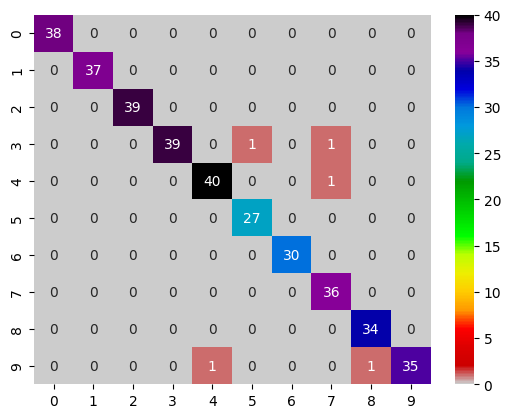

In [ ]:
axes = sns.heatmap(confusion_df, annot=True,
         cmap='nipy_spectral_r')

# creates a heatmap of the confusion matrix using seaborn with annotations and a specified color map

In [ ]:
from sklearn.model_selection import KFold
# imports the KFold class from sklearn.model_selection

In [ ]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
# creates a KFold cross-validator with 10 splits, a random state of 11, and shuffling enabled

In [ ]:
from sklearn.model_selection import cross_val_score
# imports the cross_val_score function from sklearn.model_selection

In [ ]:
scores = cross_val_score(estimator=knn, X=digits.data,
    y=digits.target, cv=kfold)

# performs cross validation on the KNN  using the digits dataset and the KFold cross validator, storing the scores in the variable 'scores'


In [ ]:
scores

# displays the cross validation scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [ ]:
print(f'Mean accuracy: {scores.mean():.2%}')
# calculates and prints the mean accuracy from the cross validation scores

Mean accuracy: 98.72%


In [ ]:
print(f'Accuracy standard deviation: {scores.std():.2%}')
# calculates and prints the standard deviation of the accuracy from the cross validation scores

Accuracy standard deviation: 0.75%
